# PMP Taylor Diagram Example

This notebook generates a Taylor Diagram using random sample data.

Reference for Taylor Diagram:
Taylor, K. E. (2001), Summarizing multiple aspects of model performance in a single diagram, J. Geophys. Res., 106(D7), 7183–7192, http://dx.doi.org/10.1029/2000JD900719

Written by Jiwoo Lee (LLNL/PCMDI)

Last update: 2022. 10

Table of Contents <a name='content' />

1. <a href=#dataset>Generate a sample dataset</a>
2. <a href=#plot>Plot Taylor Diagram</a>
    - 2.1 <a href=#basic>Basic example with labeling all models</a>
    - 2.2 <a href=#normalize>Normalize standard deviation</a>
    - 2.3 <a href=#custom>Some customizations</a>
    - 2.4 <a href=#group>Group models and label by the group</a>
    - 2.5 <a href=#arrow>Add model-comparing arrows</a>
    - 2.6 <a href=#multi>Multi-panel plot</a>

## 1. Generate a sample dataset <a name='dataset' /> 
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>

Presume a sample dataset from 10 models.

In [1]:
import numpy as np

stddev = np.random.uniform(low=1, high=10, size=(10,))  # Generate 10 random numbers between 1 and 10
corrcoeff = np.random.uniform(low=0.5, high=1, size=(10,))  # Generate 10 random numbers between 0.5 and 1
refstd = 5
models = ['model '+str(i) for i in range(1,11)]

## 2. Plot Taylor Diagram <a name='plot' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


In [2]:
import matplotlib.pyplot as plt
from pcmdi_metrics.graphics import TaylorDiagram

Usage of `TaylorDiagram` function:
       
        
Parameters
----------
    stddev : numpy.ndarray
        an array of standard deviations
    corrcoef : numpy.ndarray
        an array of correlation coefficients
    refstd : float
        the reference standard deviation
    fig : matplotlib figure, optional
        the matplotlib figure
    rect : a 3-digit integer, optional
        ax subplot rect, , default is 111, which indicate the figure has 1 row, 1 column, and this plot is the first plot.
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
        https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    title : string, optional
        title for the plot
    titleprops_dict : dict, optional
        title property dict (e.g., fontsize)
    cmap : string, optional
        a name of matplotlib colormap
        https://matplotlib.org/stable/gallery/color/colormap_reference.html
    colors : array, optional
        an array or list of colors for each element of the input arrays
        if colors is given, it will override cmap
    normalize : bool, optional
        disable to skip normalization of the standard deviation
        default is False
    labels : list, optional
        list of text for labels
    markers : list, optional
        list of marker type
    markersizes : list, optional
        list of integer for marker size
    closed_marker : bool, optional
        closed marker or opened marker
        default - True
    markercloses : list of bool,  optional
        When closed_marker is False but you still want to have a few closed markers among opened markers, provide list of True (close) or False (open)
        default - None
    zorders : list, optional
        list of integer for zorder
    ref_label : str, optional
        label for reference data
    smax : int or float, optional
        maximum of axis range for (normalized) standard deviation
    compare_models : list of tuples, optional
        list of pair of two models to compare by showing arrows
    arrowprops_dict: dict, optional
        dict for matplotlib annotation arrowprops for compare_models arrow
        See https://matplotlib.org/stable/tutorials/text/annotations.html for details
    annotate_text : string, optional
        text to place at the begining of the comparing arrow
    radial_axis_title : string, optional
        axis title for radial axis
        default - Standard deviation (when normalize=False) or Normalized standard deviation (when normalize=True)
    angular_axis_title : string, optional
        axis title for angular axis
        default - Correlation
    grid : bool, optional
        grid line in plot
        default - True
    debug : bool, optional
        default - False
        if true print some interim results for debugging purpose

Return
------
    fig : matplotlib figure
        the matplotlib figure
    ax : matplotlib axis
        the matplotlib axis

### 2.1 Basic example with labeling all models <a name='basic' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


Text(0.5, 0.98, 'Example Taylor Diagram')

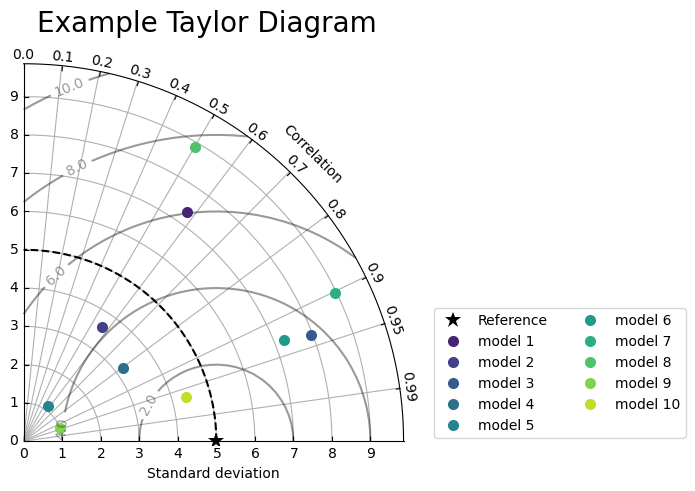

In [3]:
fig = plt.figure(figsize=(5,5))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        labels=models, 
                        ref_label='Reference'
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.2 Normalize standard deviation <a name='normalize' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>

Normalize standard deviation (radial axis) by that of the reference dataset


Text(0.5, 0.98, 'Example Taylor Diagram')

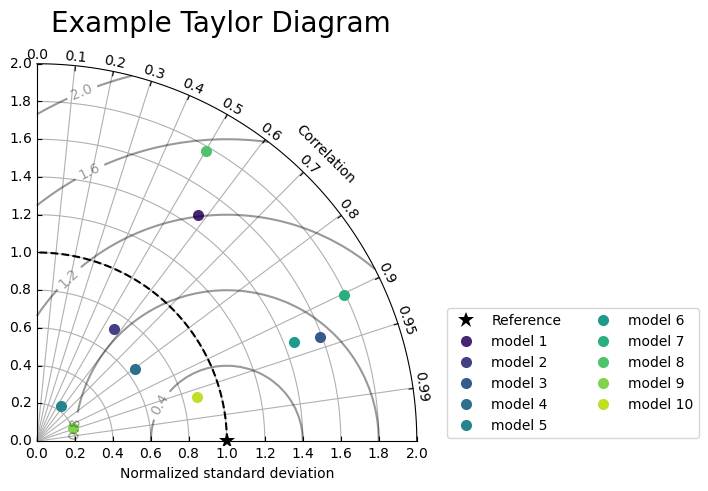

In [4]:
fig = plt.figure(figsize=(5,5))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        normalize=True, 
                        labels=models, 
                        ref_label='Reference'
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.3 Some customizations <a name='custom' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


Text(0.5, 0.98, 'Example Taylor Diagram')

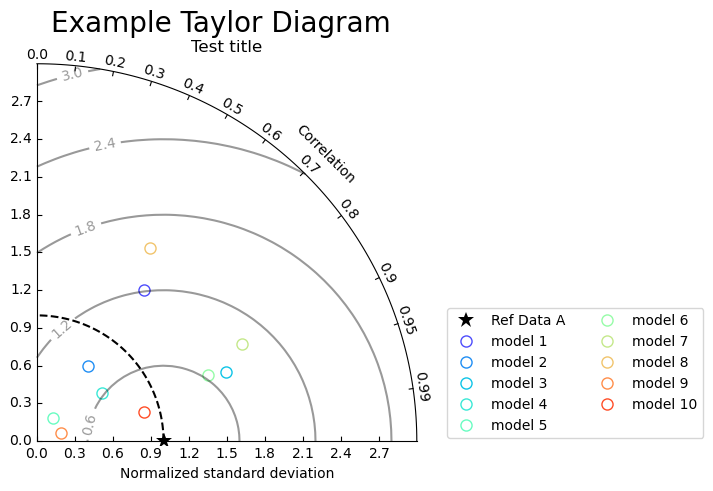

In [5]:
fig = plt.figure(figsize=(5,5))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        normalize=True, 
                        labels=models, 
                        smax=3,  # Adjust radial axis range
                        cmap='rainbow',  # matplotlib colormap
                        closed_marker=False,  # Change markers to be opened shape
                        title='Test title',  # Add subplot title
                        ref_label='Ref Data A',  # Alter reference data label
                        grid=False,  # Turn off grid lines
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.4 Group models and label by the group <a name='group' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


Text(0.5, 0.98, 'Example Taylor Diagram')

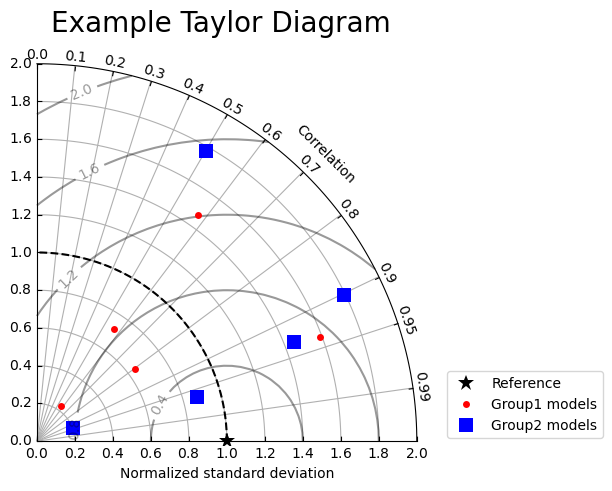

In [6]:
fig = plt.figure(figsize=(5,5))

colors1 = ['red'] * int(len(models)/2)  # For the first half models
colors2 = ['blue'] * int(len(models)/2)  # For the second half models

markers1 = ['o'] * int(len(models)/2)
markers2 = ['s'] * int(len(models)/2)

markersizes1 = [5] * int(len(models)/2)
markersizes2 = [10] * int(len(models)/2)

labels1 = ['Group1 models'] + [None] * int(len(models)/2 - 1)
labels2 = ['Group2 models'] + [None] * int(len(models)/2 - 1)

# combine colors, markers, markersizes, and labels
colors_new = colors1 + colors2
markers_new = markers1 + markers2
markersizes_new = markersizes1 + markersizes2
labels_new = labels1 + labels2

# Generate plot
fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig=fig, 
                        colors=colors_new, 
                        normalize=True, 
                        labels=labels_new, 
                        ref_label='Reference',
                        markers=markers_new, 
                        markersizes=markersizes_new
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.5 Add model-comparing arrows <a name='arrow' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


Text(0.5, 0.98, 'Example Taylor Diagram')

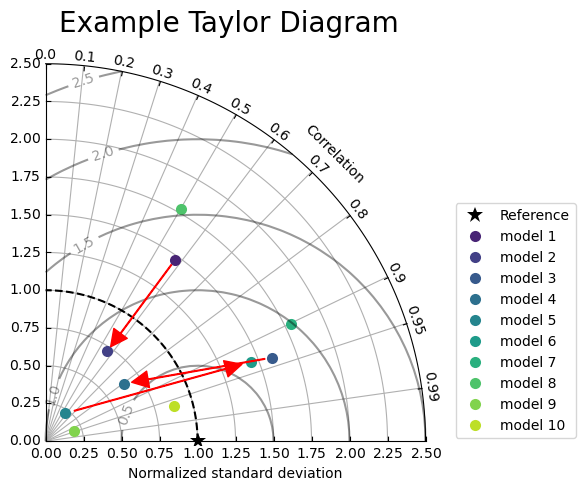

In [7]:
fig = plt.figure(figsize=(5,5))

arrowprops_dict = dict(color='red',
                       lw=1,
                       width=0.5,
                       shrink=0.05,
                       zorder=100,
                      )

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        normalize=True, 
                        labels=models, ref_label='Reference',
                        compare_models=[('model 1', 'model 2'),
                                        ('model 3', 'model 4'),
                                        ('model 5', 'model 6'),
                                       ],
                        arrowprops_dict=arrowprops_dict,
                        smax=2.5,
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.6 Multi-panel plot <a name='multi' />
<div align='right'><a href=#content>Back to the Tabel of Contents</a></div>


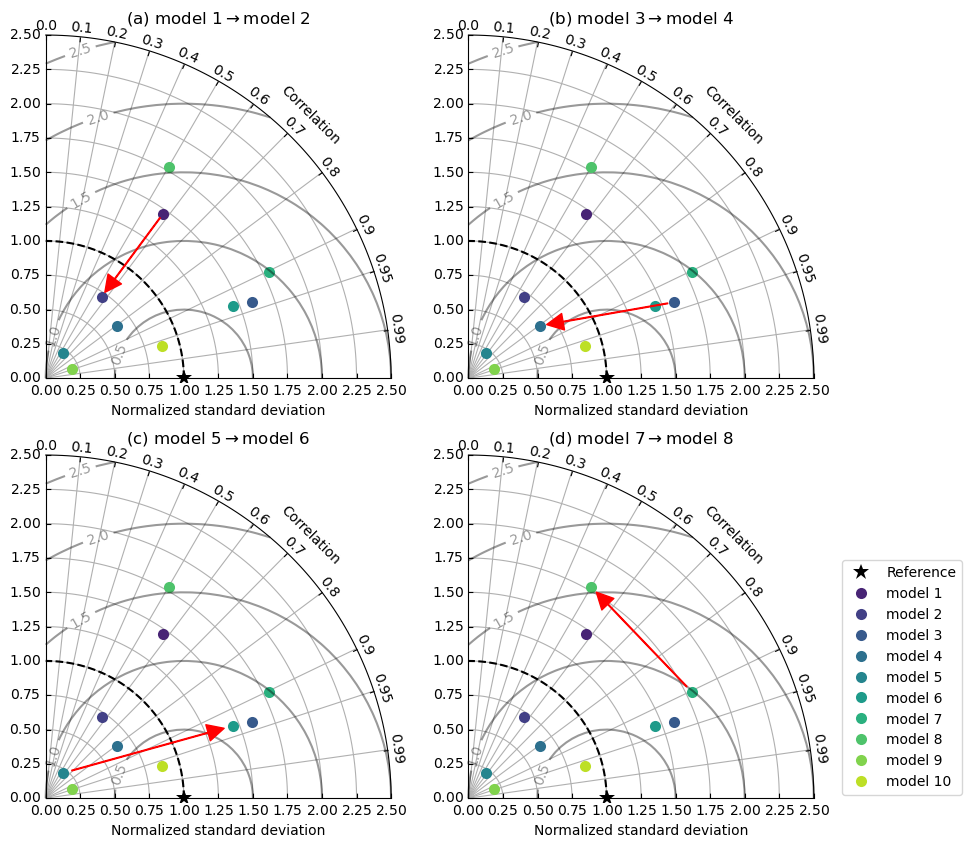

In [8]:
fig = plt.figure(figsize=(10,10))

arrowprops_dict = dict(color='red',
                       lw=1,
                       width=0.5,
                       shrink=0.05,
                       zorder=100,
                      )

fig, ax1 = TaylorDiagram(stddev, corrcoeff, refstd, 
                         fig=fig, 
                         rect=221,  # 2 row, 2 column, 1st plot
                         title='(a) model 1' + r'$\rightarrow$' + 'model 2',
                         normalize=True, 
                         labels=models, ref_label='Reference',
                         compare_models=[('model 1', 'model 2')],
                         arrowprops_dict=arrowprops_dict,
                         smax=2.5,
                        )

fig, ax2 = TaylorDiagram(stddev, corrcoeff, refstd, 
                         fig=fig, 
                         rect=222,  # 2 row, 2 column, 2nd plot
                         title='(b) model 3' + r'$\rightarrow$' + 'model 4',
                         normalize=True, 
                         labels=models, ref_label='Reference',
                         compare_models=[('model 3', 'model 4')],
                         arrowprops_dict=arrowprops_dict,
                         smax=2.5,
                        )

fig, ax3 = TaylorDiagram(stddev, corrcoeff, refstd, 
                         fig=fig, 
                         rect=223,  # 2 row, 2 column, 3rd plot
                         title='(c) model 5' + r'$\rightarrow$' + 'model 6',
                         normalize=True, 
                         labels=models, ref_label='Reference',
                         compare_models=[('model 5', 'model 6')],
                         arrowprops_dict=arrowprops_dict,
                         smax=2.5,
                        )

fig, ax4 = TaylorDiagram(stddev, corrcoeff, refstd, 
                         fig=fig, 
                         rect=224,  # 2 row, 2 column, 4th plot,
                         title='(d) model 7' + r'$\rightarrow$' +  'model 8',
                         normalize=True, 
                         labels=models, ref_label='Reference',
                         compare_models=[('model 7', 'model 8')],
                         arrowprops_dict=arrowprops_dict,
                         smax=2.5,
                        )

ax4.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)